# Loss function

* Claude+: a loss function is a way to measure how far off your machine learning model's predictions are from the actual correct values. It's also called the cost function.
* This notebook will explore a few common loss functions and the TensorFlow's (very straightforward) way to experiment with different loss functions.

## Losses for regression

* Note that binary classification can be framed as regression so depending on the task, MSE and MAE might also be applicable to binary classification as well.

### Mean squared error (MSE) / L2 Loss

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
where $y_i$ is the $i$-th true label and $\hat{y}_i$ is the $i$-th predicted label.
* The MSE loss w.r.t. prediction:

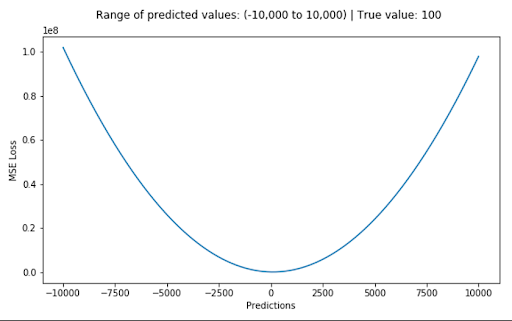

* The MSE loss function penalizes the model for making large errors by squaring them and this property makes the MSE cost function less robust to outliers. Therefore, you shouldn’t use it if the data is prone to many outliers.

In [12]:
import tensorflow as tf

mse = tf.keras.losses.MeanSquaredError()

In [9]:
y_true = [1., 1., 1., 0., 0., 0., 0.]
y_pred = [1., 1., 1., 0., 0., 0., 0.]
mse(y_true, y_pred).numpy()

0.0

In [10]:
y_true = [1., 1., 1., 0., 0., 0., 0.]
y_pred = [0., 0., 0., 1., 1., 1., 1.]
mse(y_true, y_pred).numpy()

1.0

In [28]:
y_true = [1. , 1., 1., 0.,  0.,   0., 2.]
y_pred = [-1., 0., 0., 0.5, 0.75, 1., 1.]
mse(y_true, y_pred).numpy()

1.2589285

### Mean absolute error (MAE) / L1 Loss

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
where $y_i$ is the $i$-th true label and $\hat{y}_i$ is the $i$-th predicted label.

* The MAE loss w.r.t. prediction:

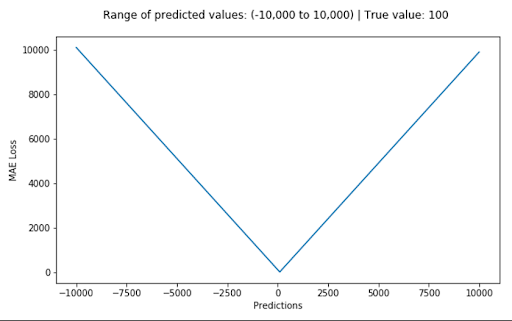

* Comapred with MSE, MAE is less sensitive to outliners and it is more interpretable as it gives the average absolute error, which is on the same scale as the original data.

* However, MSE is more convenient for optimization with gradient-based methods because it has a well-defined derivative. On the other hand, MAE is less smooth and may not have a well-defined derivative at every point, which can make optimization more difficult.

In [14]:
import tensorflow as tf

mae = tf.keras.losses.MeanAbsoluteError()

In [15]:
y_true = [1., 1., 1., 0., 0., 0., 0.]
y_pred = [1., 1., 1., 0., 0., 0., 0.]
mae(y_true, y_pred).numpy()

0.0

In [27]:
y_true = [1. , 1., 1., 0.,  0.,   0., 2.]
y_pred = [-1., 0., 0., 0.5, 0.75, 1., 1.]
print(mae(y_true, y_pred).numpy())
# MAE is easier to interpret
assert (mae(y_true, y_pred).numpy() - (2 + 1 + 1 + 0.5 + 0.75 + 1 + 1) / 7) < 0.001

1.0357143


## Losses for classification

### Binary cross-entropy / Log loss

$$
L = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]
$$
where $y_i$ is the $i$-th true label and $\hat{y}_i$ is the $i$-th predicted label.
* The Cross-entropy loss w.r.t. prediction:

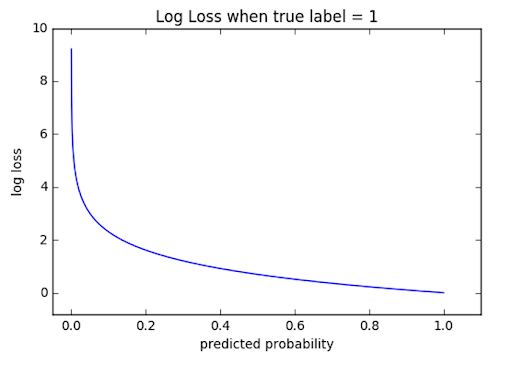

* Compared with MSE/MAE, one of the most significant limitation of cross-entropy is the range of its $y_i$ and $\hat{y}_i$ is $(0, 1)$ while MSE/MAE's $y_i$ and $\hat{y}_i$ is $(-\infty, \infty)$
* While both MSE and cross-entropy are convex functions and can be optimized using gradient-based methods, cross entropy tends to have a faster learning rate and convergence than MSE, because it has a steeper gradient when the predicted output is far from the true output (as shown in the above function graph).

In [35]:
bce = tf.keras.losses.BinaryCrossentropy()
y_true = [1., 1., 1., 0., 0., 0., 0.]
y_pred = [1., 1., 1., 0., 0., 0., 0.]
bce(y_true, y_pred).numpy()

0.0

In [36]:
y_true = [1., 1., 1., 0., 0., 0., 0.]
y_pred = [0., 0., 0., 1., 1., 1., 1.]
bce(y_true, y_pred).numpy()

15.372542

In [40]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
y_true = [1. , 1., 1., 0.,  0.,   0., 2.]
y_pred = [-1., 0., 0., 0.5, 0.75, 1., 1.]
bce(y_true, y_pred).numpy()

0.7767182

## References

1. [The 7 Most Common Machine Learning Loss Functions](https://builtin.com/machine-learning/common-loss-functions)